### Really basic examples of getting some statistics from our dataset. Outliers are already observable.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import xlrd

In [2]:
df = pd.read_excel('../data/PhoneNumberTransactionLogExample.xlsx', sheetname='Sheet1')

### Initial rows of dataset 

In [3]:
df.head(3)

,Id,TransactionTime,external_area_code,external_exchange,hashed_ExternalPhoneNumber,user_area_code,user_exchange,hashed_UserPhoneNumber
0,1,2015-09-11 23:14:27.390,612,719,0xF7227DBFA7F47A70916820773278E958148B6710,612,388,0xE84DC08DBF6D2857622C7E051336194A082A81D3
1,2,2015-09-12 01:07:33.787,215,383,0xB18325E1EEC4E9F5FD806D8CFC3B37EA7DC9BE16,612,388,0xE84DC08DBF6D2857622C7E051336194A082A81D3
2,3,2015-09-09 15:15:35.223,763,784,0x89E12C78D06B0BA167F3DC3A0481E4E50C10BDE4,612,388,0xE84DC08DBF6D2857622C7E051336194A082A81D3


### # of calls from each number

In [4]:
user_phone_number_group = df.groupby('hashed_ExternalPhoneNumber')
user_phone_number_group.size()

hashed_ExternalPhoneNumber
0x04F192572B527939DF47694557C12D0DCDD9E5CD     1
0x08CA77826125FC689AE3E0ECD7396683E67B504B     1
0x09FAE994F7CBD9DC0C61E1CF5C85D363D695F69B     1
0x0D93D15CAA958EFD8DD7AAB71CC6E647BC9BB8DD     1
0x1AF90149D0328411FA66DEF8936512EEC8DBEB91     3
0x1BC2480C8CD1C531869C02720F976FB4DD707206     2
0x1EEDC6DE5DD1D2C633DE4AC0F0CEDE0A297F9EC7     1
0x1EF891111930FFE28DE32AA1AE6B9BF04E1496A0     2
0x223C6FEF9995E60571C1FBA957FA618AA44674AE    10
0x29563A25B1A1F7E557B29D471C1F983570A3146E     1
0x29979DB19549F47DF8122C36BFB48EACA11371CC     1
0x2C35A7D91828B8B218EC8E7932C1C88BF368B314     2
0x39628D04C97D32D060DCA1BA3CCDD1B2D2569436     2
0x432AE69D4CB7D8FB676946F161680A5E60311DF4     2
0x4CF1A3D29A08C75B7437887B039CC990DCE7052D     1
0x4E612A7550FA17E7EFD178A0DE80D4BA9E0E30E5     2
0x695A52C613B35DE42807521FF2E3156E19338880     2
0x822852F45285E6678F6F62C1E9C2D1DBD59F4D91     1
0x83ACA9DAC9C0C89C01DFC410C05F21010AAC8A32     1
0x89E12C78D06B0BA167F3DC3A0481E4E50C10BDE4

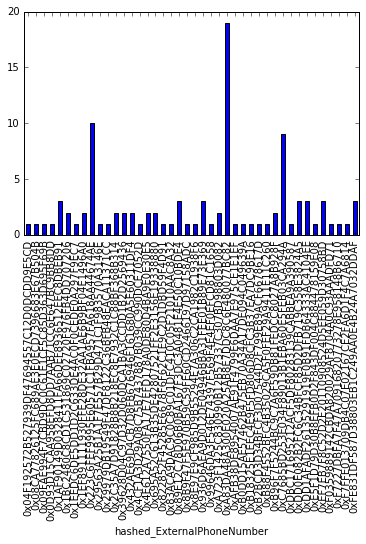

In [5]:
user_phone_number_group.size().plot('bar')

### # of calls from each area code

In [6]:
user_area_code_group = df.groupby('external_area_code')
user_area_code_group.size()

external_area_code
215     1
225    59
231     1
337     3
415     2
471     2
480     1
612     1
616     1
763     3
800     2
810     1
844    11
866     1
877     1
952     1
985     3
989     6
dtype: int64

### # of calls to each number

In [7]:
external_phone_number_group = df.groupby('hashed_UserPhoneNumber')
external_phone_number_group.size()

hashed_UserPhoneNumber
0x210B49A2E36A436BCEDE674BA608FAE809833E20    67
0x2465ECE535C90C8433081A229F221BB83D75E6A9     2
0x34B93244C1D1172FBBD2AACC3AC5A02C83DD3C49     4
0x5DEA23356855EF346EE53752692BAE0B8354D108    11
0x83C4EEB6EC2CDAB77C883544856C54DD91752A47    10
0xE84DC08DBF6D2857622C7E051336194A082A81D3     6
dtype: int64

### # of calls from each number to each area code

In [8]:
from_number_to_area_code_group = df.groupby(['hashed_ExternalPhoneNumber','user_area_code'])
from_number_to_area_code_group = from_number_to_area_code_group.size()
from_number_to_area_code_group

hashed_ExternalPhoneNumber                  user_area_code
0x04F192572B527939DF47694557C12D0DCDD9E5CD  989                1
0x08CA77826125FC689AE3E0ECD7396683E67B504B  989                1
0x09FAE994F7CBD9DC0C61E1CF5C85D363D695F69B  225                1
0x0D93D15CAA958EFD8DD7AAB71CC6E647BC9BB8DD  225                1
0x1AF90149D0328411FA66DEF8936512EEC8DBEB91  225                3
0x1BC2480C8CD1C531869C02720F976FB4DD707206  734                2
0x1EEDC6DE5DD1D2C633DE4AC0F0CEDE0A297F9EC7  989                1
0x1EF891111930FFE28DE32AA1AE6B9BF04E1496A0  225                2
0x223C6FEF9995E60571C1FBA957FA618AA44674AE  214               10
0x29563A25B1A1F7E557B29D471C1F983570A3146E  225                1
0x29979DB19549F47DF8122C36BFB48EACA11371CC  225                1
0x2C35A7D91828B8B218EC8E7932C1C88BF368B314  225                2
0x39628D04C97D32D060DCA1BA3CCDD1B2D2569436  225                2
0x432AE69D4CB7D8FB676946F161680A5E60311DF4  386                2
0x4CF1A3D29A08C75B7437887B039CC

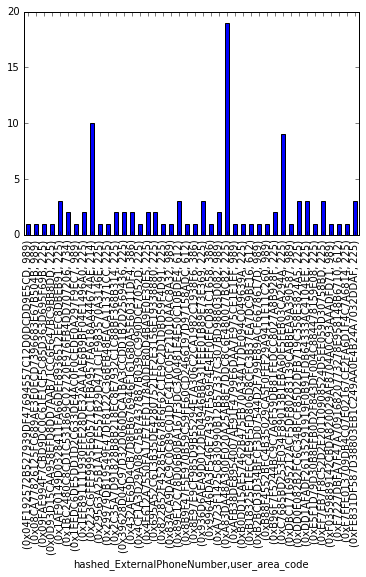

In [9]:
from_number_to_area_code_group.plot('bar')